In [1]:
import preprocessors
from sktime.forecasting.var import VAR
from sktime.forecasting.base import ForecastingHorizon
import evaluators
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.difference import Differencer

 # Experiment 1 - VAR not tuned

In [2]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [3]:
model2 = VAR(random_state=42)
model2.fit(y_train)
fh2 = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts2 = model2.predict(fh2)

In [4]:
evaluator2 = evaluators.Evaluator(y_train, y_pred, forecasts2)
results2 = evaluator2.sktime_dtw()

Median sktime DTW distance for feature HR: 115.46294786907221
Median sktime DTW distance for feature O2Sat: 9.01447464473555
Median sktime DTW distance for feature SBP: 370.4744927989013
Median sktime DTW distance for feature MAP: 268.6289075887738
Median sktime DTW distance for feature DBP: 81.43583520003483
Median sktime DTW distance for feature Resp: 28.44585453980303
Median sktime DTW distance for feature Temp: 0.1843337364307192


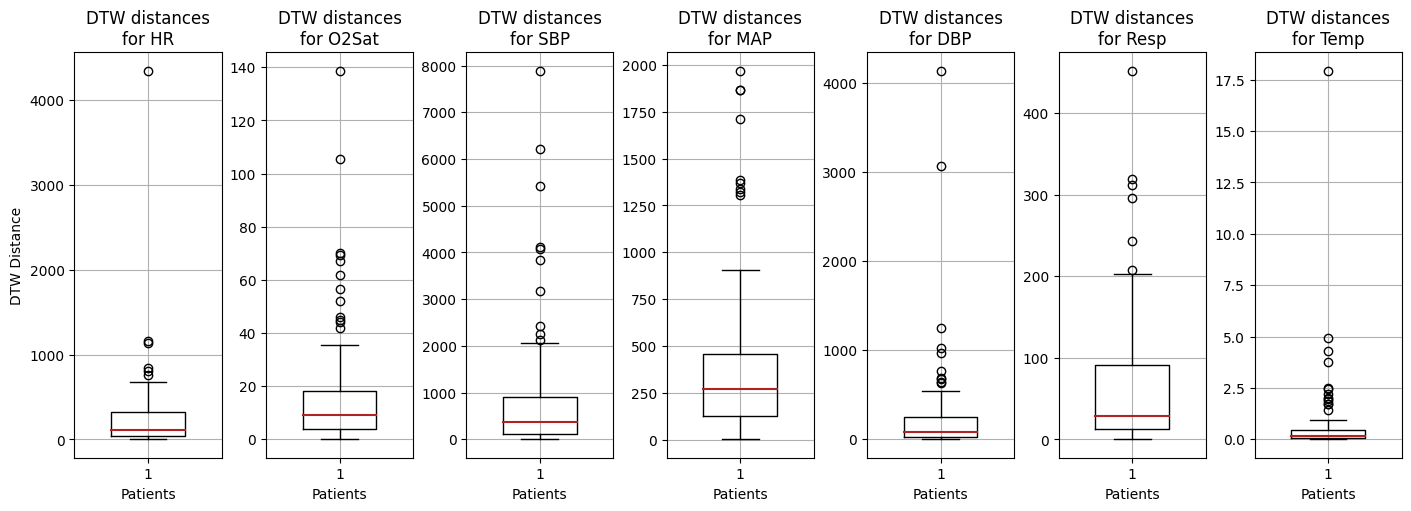

In [5]:
evaluator2.box_plot_dtw(results2)

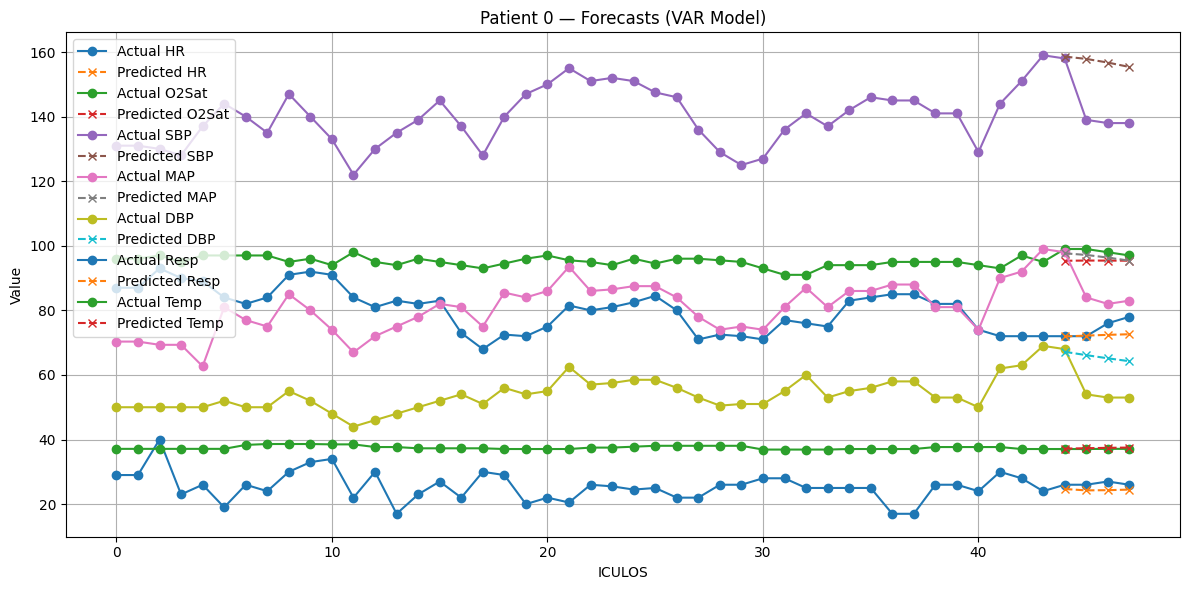

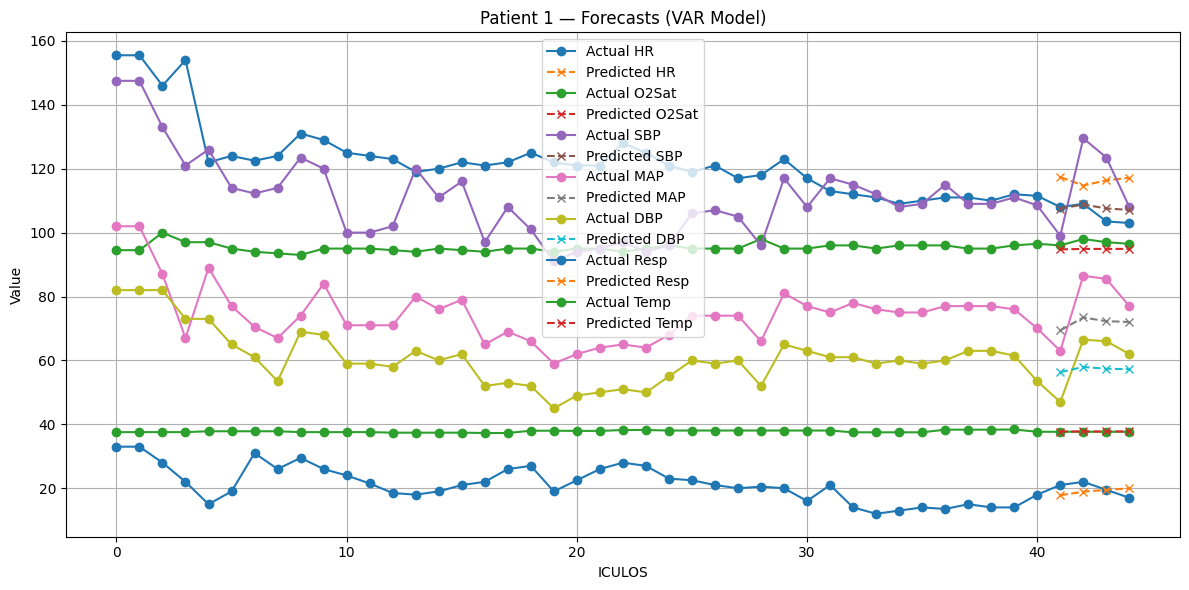

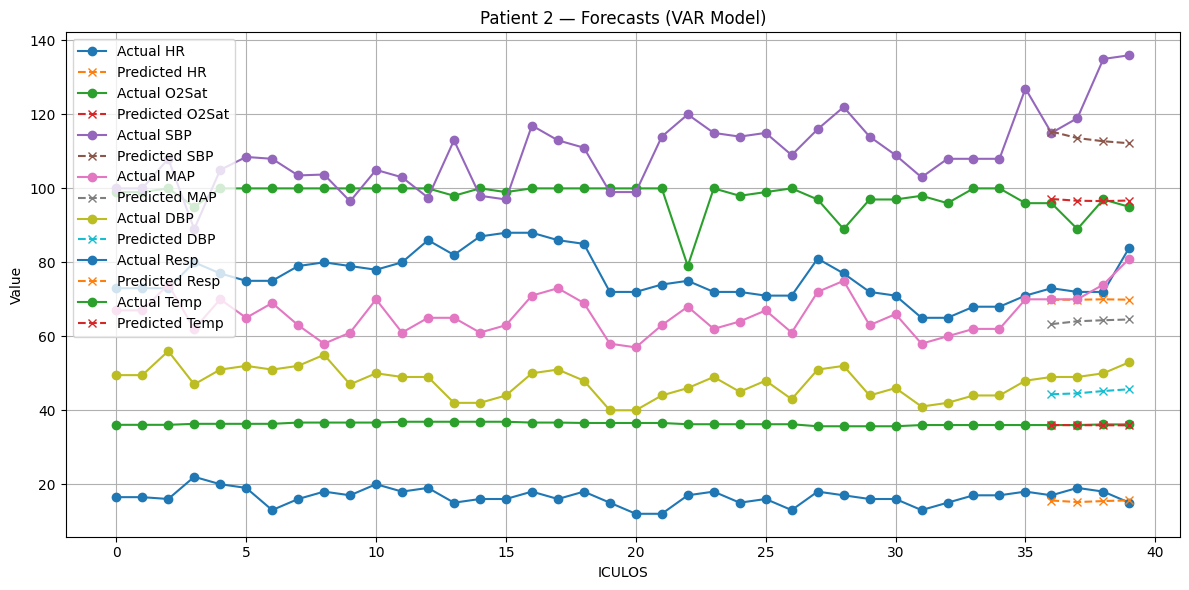

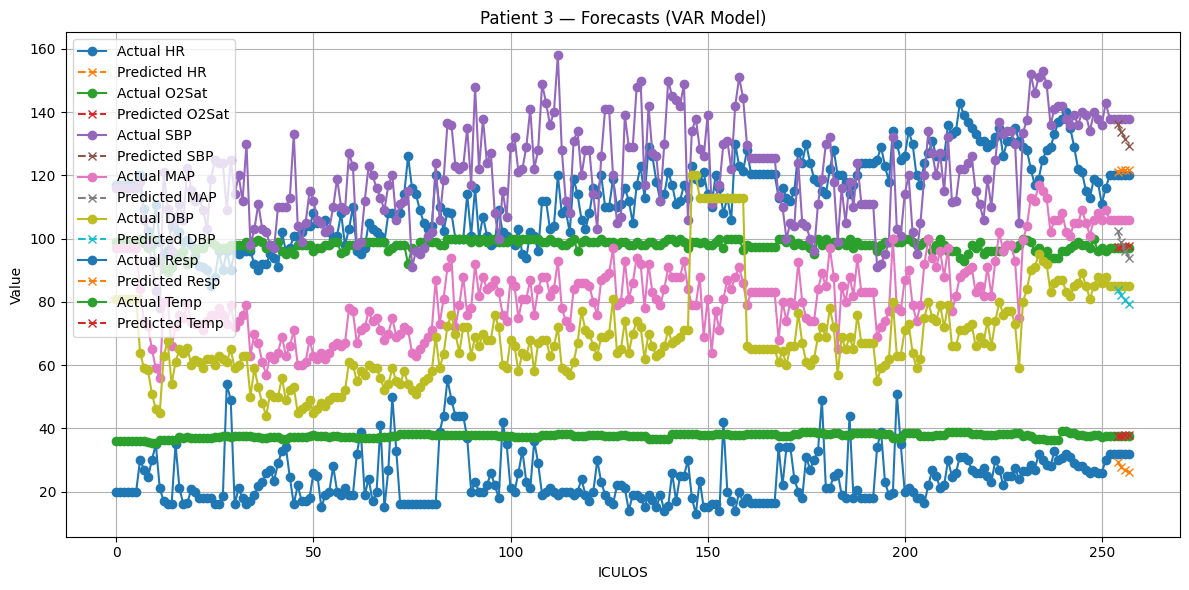

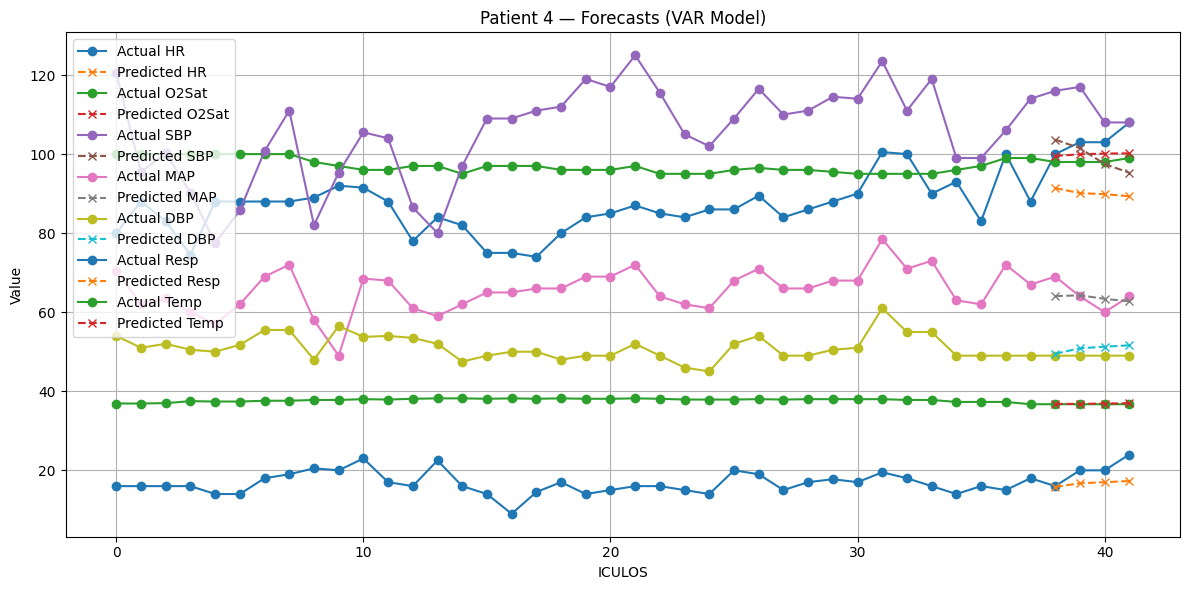

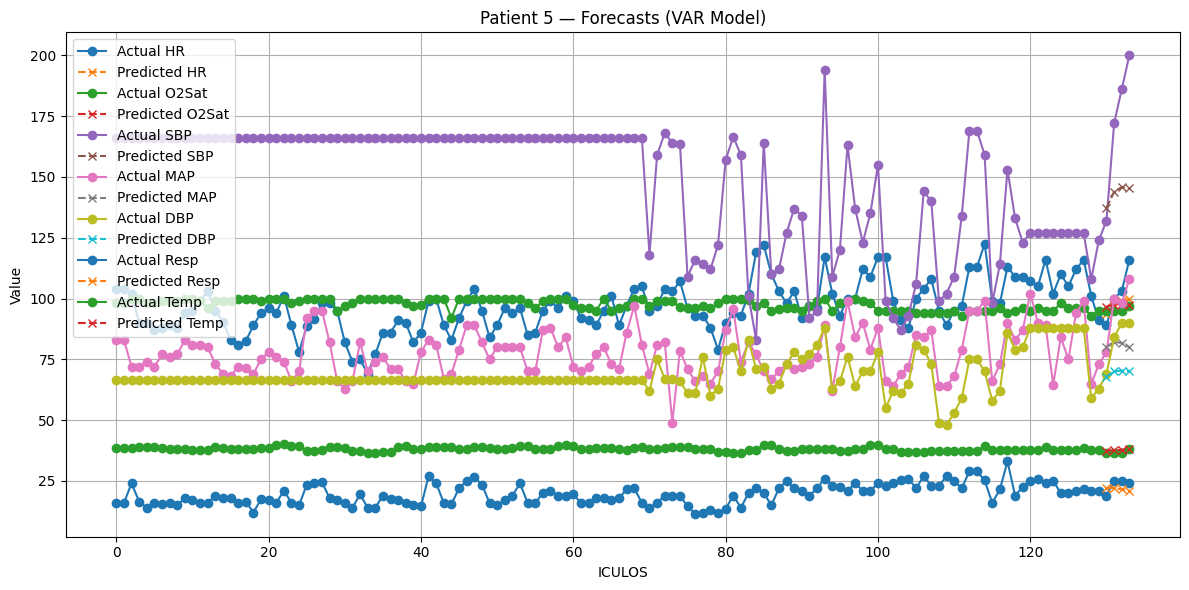

In [6]:
evaluator2.plot_multivar(5)

# Experiment 2 - VAR tuned

In [6]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [7]:
model = VAR(maxlags=2, method="ols", verbose=False, trend="c", random_state=42)

In [8]:
model.fit(y_train)
fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(fh)

In [9]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 149.49146391701078
Median sktime DTW distance for feature O2Sat: 9.237171632611732
Median sktime DTW distance for feature SBP: 434.17862906786087
Median sktime DTW distance for feature MAP: 300.37035491718825
Median sktime DTW distance for feature DBP: 114.15217672346603
Median sktime DTW distance for feature Resp: 30.53942169826758
Median sktime DTW distance for feature Temp: 0.37630465772391813


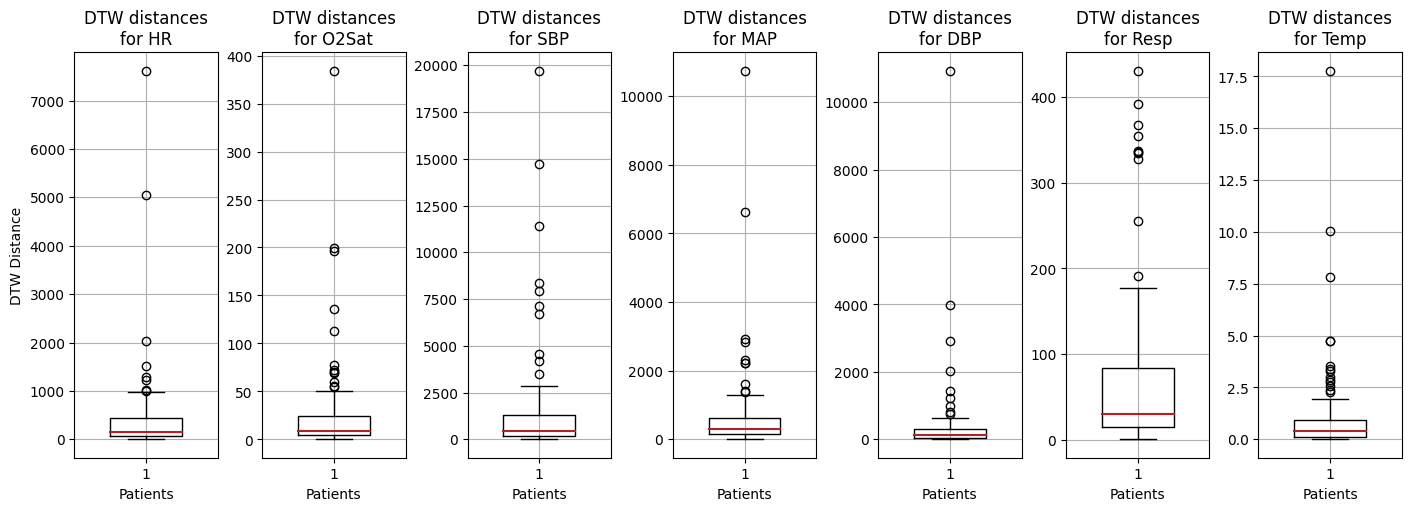

In [10]:
myEvaluator.box_plot_dtw(results)

# Experiment 3

In [11]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [12]:
model = TransformedTargetForecaster(steps=[
    ("diff", Differencer()),     # makes the data stationary
    ("var", VAR(random_state=42))               # fit VAR on differenced data
])

In [13]:
model.fit(y_train)
fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(fh)

In [14]:
evaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = evaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 137.024181302142
Median sktime DTW distance for feature O2Sat: 9.758186296537254
Median sktime DTW distance for feature SBP: 359.7699864378965
Median sktime DTW distance for feature MAP: 225.9709612731732
Median sktime DTW distance for feature DBP: 104.2643867309129
Median sktime DTW distance for feature Resp: 36.38261684915924
Median sktime DTW distance for feature Temp: 0.09997475621234417


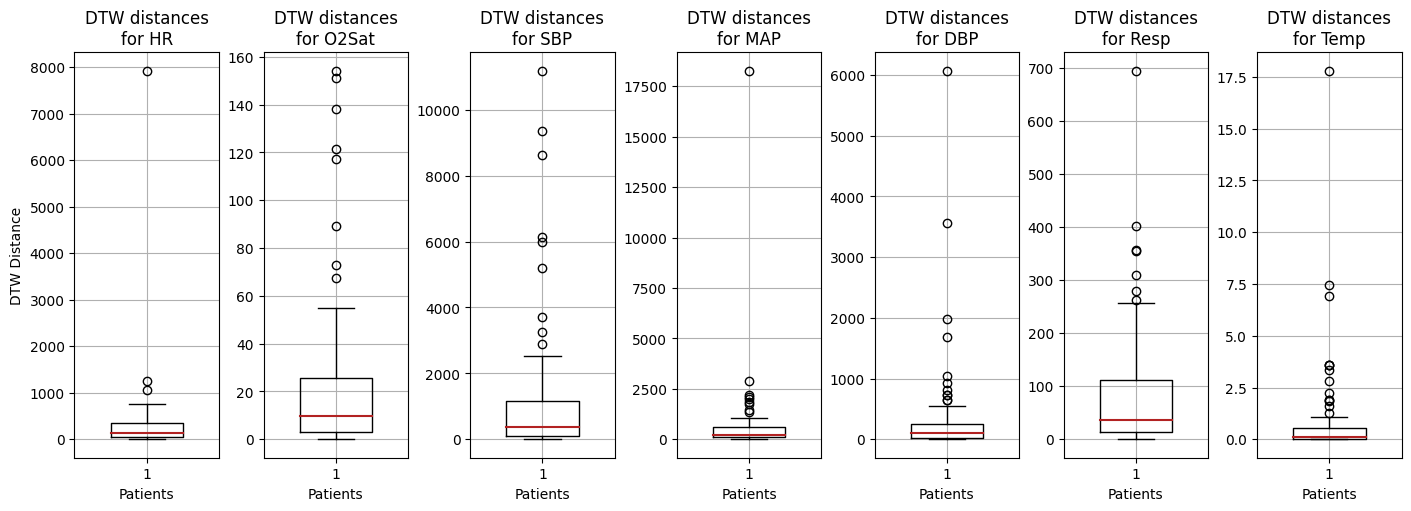

In [15]:
evaluator.box_plot_dtw(results)

In [19]:
model.get_tags()

{'python_version': None,
 'python_dependencies': None,
 'python_dependencies_alias': {'scikit-learn': 'sklearn'},
 'env_marker': None,
 'authors': ['mloning', 'fkiraly', 'aiwalter'],
 'maintainers': 'sktime developers',
 'object_type': 'forecaster',
 'scitype:y': 'both',
 'ignores-exogeneous-X': True,
 'capability:insample': True,
 'capability:pred_int': True,
 'capability:pred_int:insample': False,
 'handles-missing-data': True,
 'y_inner_mtype': ['pd.DataFrame', 'pd-multiindex', 'pd_multiindex_hier'],
 'X_inner_mtype': ['pd.DataFrame', 'pd-multiindex', 'pd_multiindex_hier'],
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': False,
 'enforce_index_type': None,
 'fit_is_empty': False}

In [ ]:
# trying scaler

In [22]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale each column across all patients and time points
scaler = StandardScaler()
y_train_scaled = pd.DataFrame(
    scaler.fit_transform(y_train),
    index=y_train.index,
    columns=y_train.columns
)

model2 = VAR()
model2.fit(y_train_scaled)

# Forecast
fh2 = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts_scaled = model2.predict(fh2)

# Unscale the forecast manually
forecasts_unscaled = pd.DataFrame(
    scaler.inverse_transform(forecasts_scaled),
    index=forecasts_scaled.index,
    columns=forecasts_scaled.columns
)


In [23]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts_unscaled)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 115.46294786906992
Median sktime DTW distance for feature O2Sat: 9.014474644735369
Median sktime DTW distance for feature SBP: 370.4744927988973
Median sktime DTW distance for feature MAP: 268.6289075887779
Median sktime DTW distance for feature DBP: 81.43583520004373
Median sktime DTW distance for feature Resp: 28.445854539802163
Median sktime DTW distance for feature Temp: 0.18433373643072987


In [ ]:
myEvaluator.box_plot_dtw(results)

In [24]:
# Step 1: Differencing
y_train_diff = y_train.groupby(level=0).diff().dropna()

# Step 2: Fit VAR
model2 = VAR()
model2.fit(y_train_diff)

# Step 3: Forecast
fh2 = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts_diff = model2.predict(fh2)

# Step 4: Undifference (assuming you saved last observed y_train)
last_values = y_train.groupby(level=0).last()

# Cumulative sum and add last observed
forecasts = forecasts_diff.groupby(level=0).cumsum() + last_values


C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupporte

In [25]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 139.36979313078368
Median sktime DTW distance for feature O2Sat: 9.752874601128603
Median sktime DTW distance for feature SBP: 358.61760110968993
Median sktime DTW distance for feature MAP: 222.0717999350544
Median sktime DTW distance for feature DBP: 106.50005088570494
Median sktime DTW distance for feature Resp: 35.21979977137603
Median sktime DTW distance for feature Temp: 0.08580086847443019


In [28]:
# import varmax
from sktime.forecasting.varmax import VARMAX

model = VARMAX()
model.fit(y_train)
fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(fh)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\e

In [29]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 106.6038155466814
Median sktime DTW distance for feature O2Sat: 8.539635082590259
Median sktime DTW distance for feature SBP: 398.68183937704714
Median sktime DTW distance for feature MAP: 277.7985818713522
Median sktime DTW distance for feature DBP: 86.95623407410066
Median sktime DTW distance for feature Resp: 33.75336038582318
Median sktime DTW distance for feature Temp: 0.18917571836495178
